## Self-Organizing Feature Maps (SOFM) for character recognition

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
characters = {
    'A': np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]]),
    
    'B': np.array([[1, 1, 0],
                   [1, 1, 0],
                   [1, 1, 1]]),
    
    'C': np.array([[1, 1, 1],
                   [1, 0, 0],
                   [1, 1, 1]]),
    
    'D': np.array([[1, 1, 0],
                   [1, 1, 0],
                   [1, 1, 1]])
}

In [3]:
data = np.array([char.flatten() for char in characters.values()])
labels = list(characters.keys())

In [4]:
class SOM:
    def __init__(self, x, y, input_len, learning_rate=0.5, radius=1):
        self.x = x
        self.y = y
        self.input_len = input_len
        self.learning_rate = learning_rate
        self.radius = radius
        
        # Initialize weights
        self.weights = np.random.rand(x, y, input_len)

    def _get_bmu(self, x):
        # Calculate the Best Matching Unit (BMU)
        bmu_idx = np.argmin(np.linalg.norm(self.weights - x, axis=2))
        return divmod(bmu_idx, self.y)

    def _neighborhood_function(self, distance):
        return np.exp(-distance / (2 * (self.radius ** 2)))

    def train(self, data, num_epochs):
        for epoch in range(num_epochs):
            for x in data:
                bmu = self._get_bmu(x)
                
                # Update weights
                for i in range(self.x):
                    for j in range(self.y):
                        distance = np.linalg.norm(np.array([i, j]) - np.array(bmu))
                        if distance <= self.radius:
                            # Calculate learning rate based on neighborhood
                            learning_rate = self.learning_rate * self._neighborhood_function(distance)
                            self.weights[i, j] += learning_rate * (x - self.weights[i, j])
    
    def predict(self, x):
        bmu = self._get_bmu(x)
        return bmu

    def visualize(self):
        # Reshape weights for visualization
        weight_images = self.weights.reshape(self.x * self.y, self.input_len)
        plt.figure(figsize=(8, 8))
        for i in range(weight_images.shape[0]):
            plt.subplot(self.x, self.y, i + 1)
            plt.imshow(weight_images[i].reshape(3, 3), cmap='gray', vmin=0, vmax=1)
            plt.axis('off')
        plt.tight_layout()
        plt.show()

Predicted BMU for character C: (0, 0)


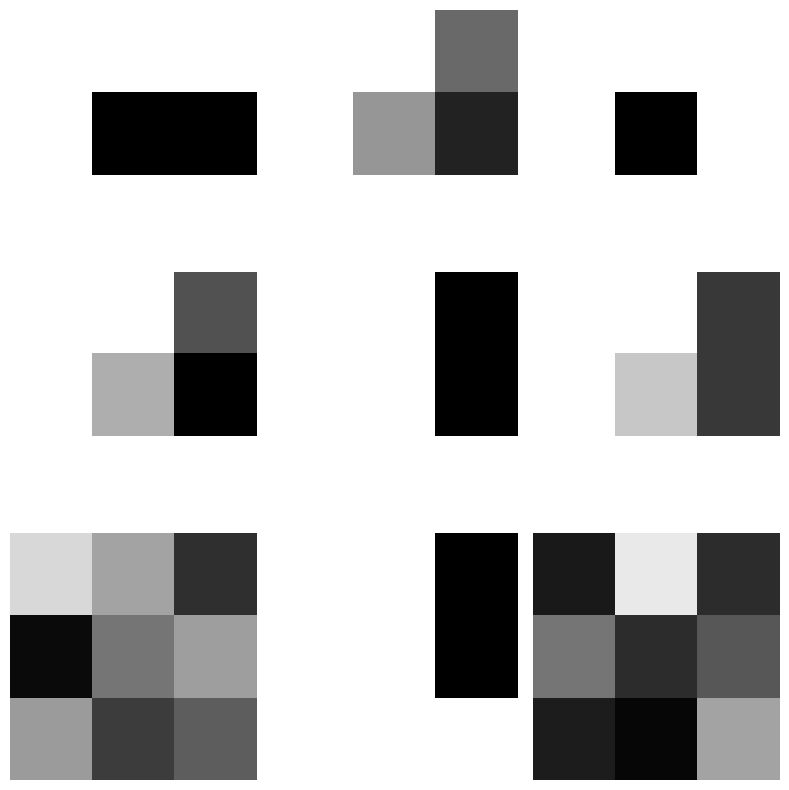

In [5]:
som = SOM(x=3, y=3, input_len=9, learning_rate=0.5, radius=1)
som.train(data, num_epochs=100)

test_char = np.array([[1, 1, 1],
                      [1, 0, 0],
                      [1, 1, 1]]).flatten()  # 'C'
prediction = som.predict(test_char)
print(f"Predicted BMU for character C: {prediction}")

som.visualize()